<a href="https://colab.research.google.com/github/santhoshsrivi/study/blob/main/Advanced_statistical_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Business Problem**

A Marketing Organization outsources their back-office operations to three diffrenet suppliers. The contracts are up for renewal and CMO wants to determine whether they should renew contracts with all suppliers or any specific suppliers. CMO want to renew the contract of suppliers with the least transaction time. CMO will renew all contarcts if the performance of all suppliers is similar

In [1]:
! mkdir ~/.kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alagusantosh","key":"134ca1776e74692493140f151cb2885f"}'}

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download -d mdimraniqbal/contract-renewal-hypothesis-testing

  0% 0.00/8.41k [00:00<?, ?B/s]
100% 8.41k/8.41k [00:00<00:00, 15.9MB/s]


In [6]:
! unzip /content/contract-renewal-hypothesis-testing.zip

Archive:  /content/contract-renewal-hypothesis-testing.zip
  inflating: ContractRenewal_Data(unstacked).xlsx  


In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import scipy
from scipy import stats

In [9]:
data = pd.read_excel("/content/ContractRenewal_Data(unstacked).xlsx")
data

,Supplier A,Supplier B,Supplier C
0,6.15,7.87,7.41
1,6.22,5.21,3.61
2,6.76,7.94,7.23
3,4.29,7.36,5.53
4,7.08,6.17,3.97
...,...,...,...
115,5.85,4.53,4.27
116,5.04,8.06,6.39
117,5.68,7.14,4.60
118,4.77,4.84,6.15


To fulfill the requirements wheather performance of suppliers is similar or not, we do some Statistical Operation called Hypothesis-testing here.

In chain of Statistical Operation we do:

-->1st Normality check to see if the given data is Normal or Not.

-->2nd Variance check to see if variation is present in given data or Not

-->3rd One way ANOVA Test to see if the performance of suppliers is similar to each other or not

1) Normality check: To doing this Our Assumption for Normality Check is,

H0 = Data Is Normal,

H1 = Data is Not-Normal.

To achive this Assumption we take help of "shapiro" from bucket of "scipy.stats" library of pyhton.

Variance check: Our Assumption for Varinace Check is,

H0 = there is no significant difference in the variability or spread of the data among the different groups.

H1 = there is a significant difference in the variability or spread of the data among the different groups.

To achive this Assumption we take help of "levene" from bucket of "scipy.stats" library of pyhton.

Levene’s test is used to assess the equality of variance between two different samples. For every case, it calculates the absolute difference between the value of that case and its cell mean.

 One way ANOVA: TAssumption for performance of suppliers is,

 H0 = Performance of all suppliers is equal to each other

 H1 = Performance of all suppliers is not equal to each other.

 For this test we take help of "f_oneway" from bucket of "scipy.stats" library of pyhton

The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes

Here we check only p value(Probability value) for every test

Probability value (p value) > 0.05, it means Assumption H0 is exist (Accept Null Hypothesis (H0) / Reject Alternate Hypothesis (H1))

Probability value (p value) < 0.05, it means Assumption H1 is exist ( Accept Alternate Hypothesis (H1) / Reject Null Hypothesis (H0))



**Normality test**

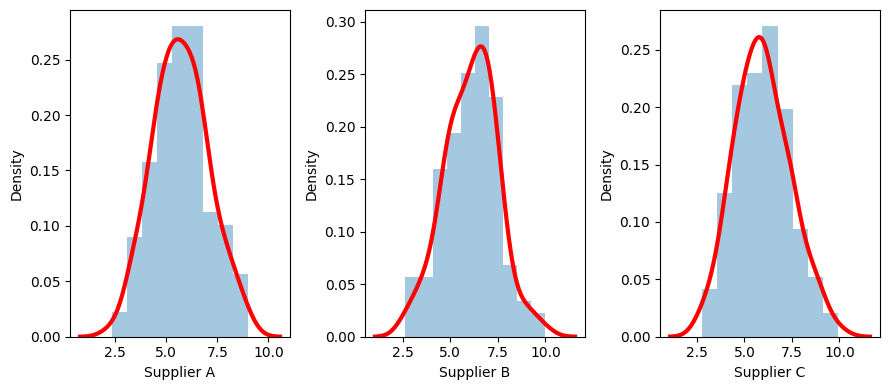

In [10]:
plt.figure(figsize = (9,4))

plt.subplot(1,3,1)
sns.distplot(data["Supplier A"], kde_kws = {"color":"r", "lw":3})

plt.subplot(1,3,2)
sns.distplot(data["Supplier B"], kde_kws = {"color":"r", "lw":3})

plt.subplot(1,3,3)
sns.distplot(data["Supplier C"], kde_kws = {"color":"r", "lw":3})

plt.tight_layout()
plt.show()

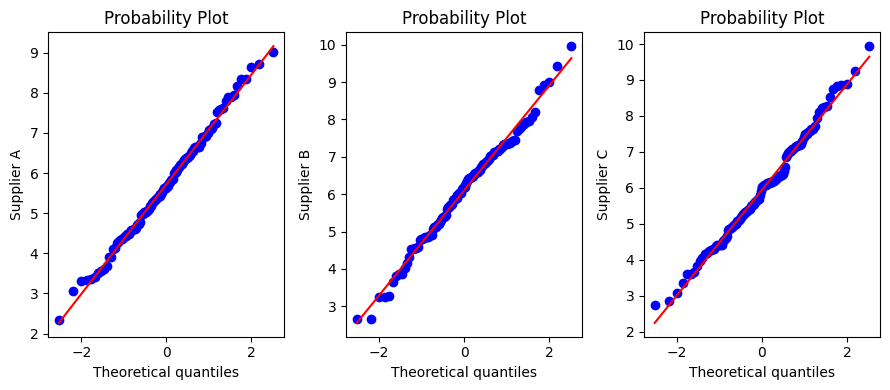

In [11]:
plt.figure(figsize = (9,4))

plt.subplot(1,3,1)
stats.probplot(data["Supplier A"], dist = "norm", plot = plt)
plt.ylabel("Supplier A")

plt.subplot(1,3,2)
stats.probplot(data["Supplier B"], dist = "norm", plot = plt)
plt.ylabel("Supplier B")

plt.subplot(1,3,3)
stats.probplot(data["Supplier C"], dist = "norm", plot = plt)
plt.ylabel("Supplier C")

plt.tight_layout()
plt.show()

In [12]:
def normality_check(i):
    print("{}".format(i))
    shapiro = stats.shapiro(data[i])# Shapiro Test
    print(shapiro)
    print()
    pval = shapiro[1]
    alpha = 0.05
    if pval < alpha:
        print("Probability: ", pval)
        print("REJECT HO Assupmtion / ACCEPT H1 Assumption")
        print("Hence, Data is Not-Normal")

    else:
        print("Probability: ", pval)
        print("ACCEPT H0 Assupmtion / REJECT H1 Assumption")
        print("Hence, Data is Normal")

    print("...................................................")

for i in data.columns:
    normality_check(i)

Supplier A
ShapiroResult(statistic=0.9940786957740784, pvalue=0.8961992859840393)

Probability:  0.8961992859840393
ACCEPT H0 Assupmtion / REJECT H1 Assumption
Hence, Data is Normal
...................................................
Supplier B
ShapiroResult(statistic=0.9912325143814087, pvalue=0.6483432650566101)

Probability:  0.6483432650566101
ACCEPT H0 Assupmtion / REJECT H1 Assumption
Hence, Data is Normal
...................................................
Supplier C
ShapiroResult(statistic=0.9904158711433411, pvalue=0.5719417929649353)

Probability:  0.5719417929649353
ACCEPT H0 Assupmtion / REJECT H1 Assumption
Hence, Data is Normal
...................................................


**Variance test**

In [15]:
def variance_check():
    print("{}".format(i))
    levene = stats.levene(data["Supplier A"], data["Supplier B"], data["Supplier C"])
    print(levene)
    print()
    pval = levene[1]
    alpha = 0.05
    if pval < alpha:
        print("Probability: ", pval)
        print("REJECT HO Assupmtion / ACCEPT H1 Assumption")
        print("There is no significant difference in the variability or spread of the data among the different groups")

    else:
        print("Probability: ", pval)
        print("ACCEPT H0 Assupmtion / REJECT H1 Assumption")
        print("There is a significant difference in the variability or spread of the data among the different groups")

variance_check()

Supplier C
LeveneResult(statistic=0.25183988720942463, pvalue=0.7775071819400866)

Probability:  0.7775071819400866
ACCEPT H0 Assupmtion / REJECT H1 Assumption
There is a significant difference in the variability or spread of the data among the different groups


**One way ANOVA**

In [16]:
def performance_check():
    print("{}".format(i))
    ANOVA = stats.f_oneway(data["Supplier A"], data["Supplier B"], data["Supplier C"])
    print(ANOVA)
    print()
    pval = ANOVA[1]
    alpha = 0.05
    if pval < alpha:
        print("Probability: ", pval)
        print("REJECT HO Assupmtion / ACCEPT H1 Assumption")
        print("Hence, Performance of all suppliers is not similar to each other")

    else:
        print("Probability: ", pval)
        print("ACCEPT H0 Assupmtion / REJECT H1 Assumption")
        print("Hence, Performance of all suppliers is similar to each other")

performance_check()

Supplier C
F_onewayResult(statistic=2.280378701368123, pvalue=0.10373295731933224)

Probability:  0.10373295731933224
ACCEPT H0 Assupmtion / REJECT H1 Assumption
Hence, Performance of all suppliers is similar to each other


**Conclusion**

Since the performance of all the suppliers are similar to each other the CMO will renew the contracts of all the suppliers